# 데이터분석 과제테스트 예시 문제 & 답안

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# 샘플 데이터 생성
np.random.seed(42)
df = pd.DataFrame({
    'age': np.random.randint(20, 70, 1000),
    'income': np.random.normal(50000, 20000, 1000),
    'education_years': np.random.randint(9, 22, 1000),
    'satisfaction': np.random.randint(1, 6, 1000),
    'department': np.random.choice(['Sales', 'IT', 'HR', 'Finance'], 1000)
})

In [3]:
# 일부 결측치 생성
df.loc[np.random.choice(df.index, 50), 'income'] = np.nan
df.loc[np.random.choice(df.index, 30), 'satisfaction'] = np.nan

In [4]:
df.head()

,age,income,education_years,satisfaction,department
0,58,37658.191834,16,3.0,Sales
1,48,24823.159169,21,3.0,HR
2,34,73776.020153,20,4.0,Sales
3,62,49173.831388,18,5.0,HR
4,27,NaN,14,5.0,Finance


## 1. 결측치 처리

In [5]:
df.isnull().sum()

age                 0
income             49
education_years     0
satisfaction       29
department          0
dtype: int64

In [6]:
df['income'].fillna(df['income'].mean(), inplace = True)

/tmp/ipykernel_26372/1704428518.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['income'].fillna(df['income'].mean(), inplace = True)


## 2. 이상치 처리

In [10]:
# IQRT를 이용한 이상치 제거
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]

## 3. 데이터 정규화

In [11]:
scaler = StandardScaler()
df['income_standardized'] = scaler.fit_transform(df[['income']])

## 4. 그룹별 통계

In [12]:
"""
문제 4: 그룹별 통계
부서(department)별 평균 급여(income)를 계산하고, 내림차순으로 정렬하시오.
"""
dept_income = df.groupby('department')['income'].mean().sort_values(ascending=False)
dept_income

department
Finance    53584.231422
HR         52428.853023
Sales      51429.212061
IT         49050.391437
Name: income, dtype: float64

## 5. 조건부 필터링

나이가 30세 이상이고 수입이 전체 평균 수입보다 높은 직원의 수를 구하시오.

In [13]:
condition = (df['age'] >= 30) & (df['income'] > df['income'].mean())
len(df[condition])

389

## 6. 새로운 피처 생성

수입을 나이로 나눈 새로운 칼럼 'income_per_age'를 생성하시오.

In [14]:
df['income_per_age'] = df['income'] / df['age']
df['income_per_age']

0       649.279170
1       517.149149
2      2169.882946
3       793.126313
4      1914.258943
          ...     
995     814.879786
996    1549.479054
997    1269.518596
998    1206.125728
999    1030.672994
Name: income_per_age, Length: 1000, dtype: float64

## 7. 상관관계 분석

수치형 변수들 간의 상관관계를 계산하고, 가장 강한 상관관계를 가진 변수 쌍을 찾으시오.

In [15]:
corr_matrix = df.select_dtypes(include=[np.number]).corr()
corr_matrix = corr_matrix.abs().unstack()
corr_matrix = corr_matrix[corr_matrix < 1.0]
max_corr = corr_matrix.max()
max_corr_pairs = corr_matrix[corr_matrix == max_corr].index.tolist()

max_corr_pairs[0]

('income_standardized', 'income_per_age')

## 8. 범주형 데이터 처리

'department' 칼럼을 원-핫 인코딩으로 변환하시오.

In [18]:
dept_dummies = pd.get_dummies(df['department'], prefix='dept')
pd.concat([df, dept_dummies], axis=1)
df.head()

,age,income,education_years,satisfaction,department,income_standardized,income_per_age
0,58,37658.191834,16,3.0,Sales,-0.681640,649.279170
1,48,24823.159169,21,3.0,HR,-1.305366,517.149149
2,34,73776.020153,20,4.0,Sales,1.073526,2169.882946
3,62,49173.831388,18,5.0,HR,-0.122031,793.126313
4,27,51684.991463,14,5.0,Finance,0.000000,1914.258943


## 9. 데이터 시각화

연령대별 평균 수입을 보여주는 막대 그래프를 생성하시오.
(연령대는 10살 단위로 구분)

/tmp/ipykernel_26372/1384337533.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_income = df.groupby('age_group')['income'].mean()


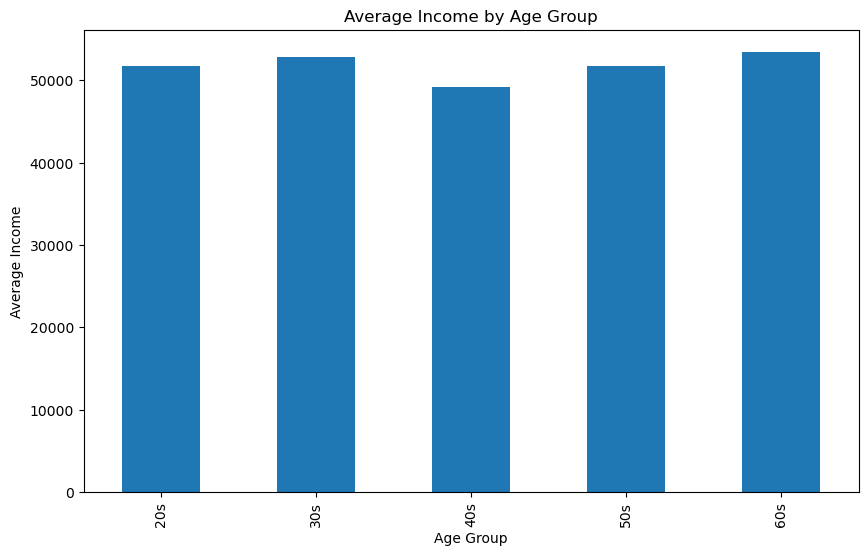

In [19]:
df['age_group'] = pd.cut(df['age'], bins=range(20, 71, 10), labels=['20s', '30s', '40s', '50s', '60s'])
age_income = df.groupby('age_group')['income'].mean()

plt.figure(figsize=(10, 6))
age_income.plot(kind='bar')
plt.title('Average Income by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Income')
plt.show()